In [ ]:
# --------------

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data

# Load the dataset
df = pd.read_csv('../../../data/XAUUSD_2010-2023.csv').head(1000)

# Add the first data entry

# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Select relevant features for clustering
features = ['open',
            'high',
            'low',
            'close',
            # 'rsi14', 
            'sma14'
            ]
X = df[features]

In [2]:

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_scaled)
df['Cluster']

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Cluster, Length: 1000, dtype: int64

<Figure size 1500x1000 with 0 Axes>

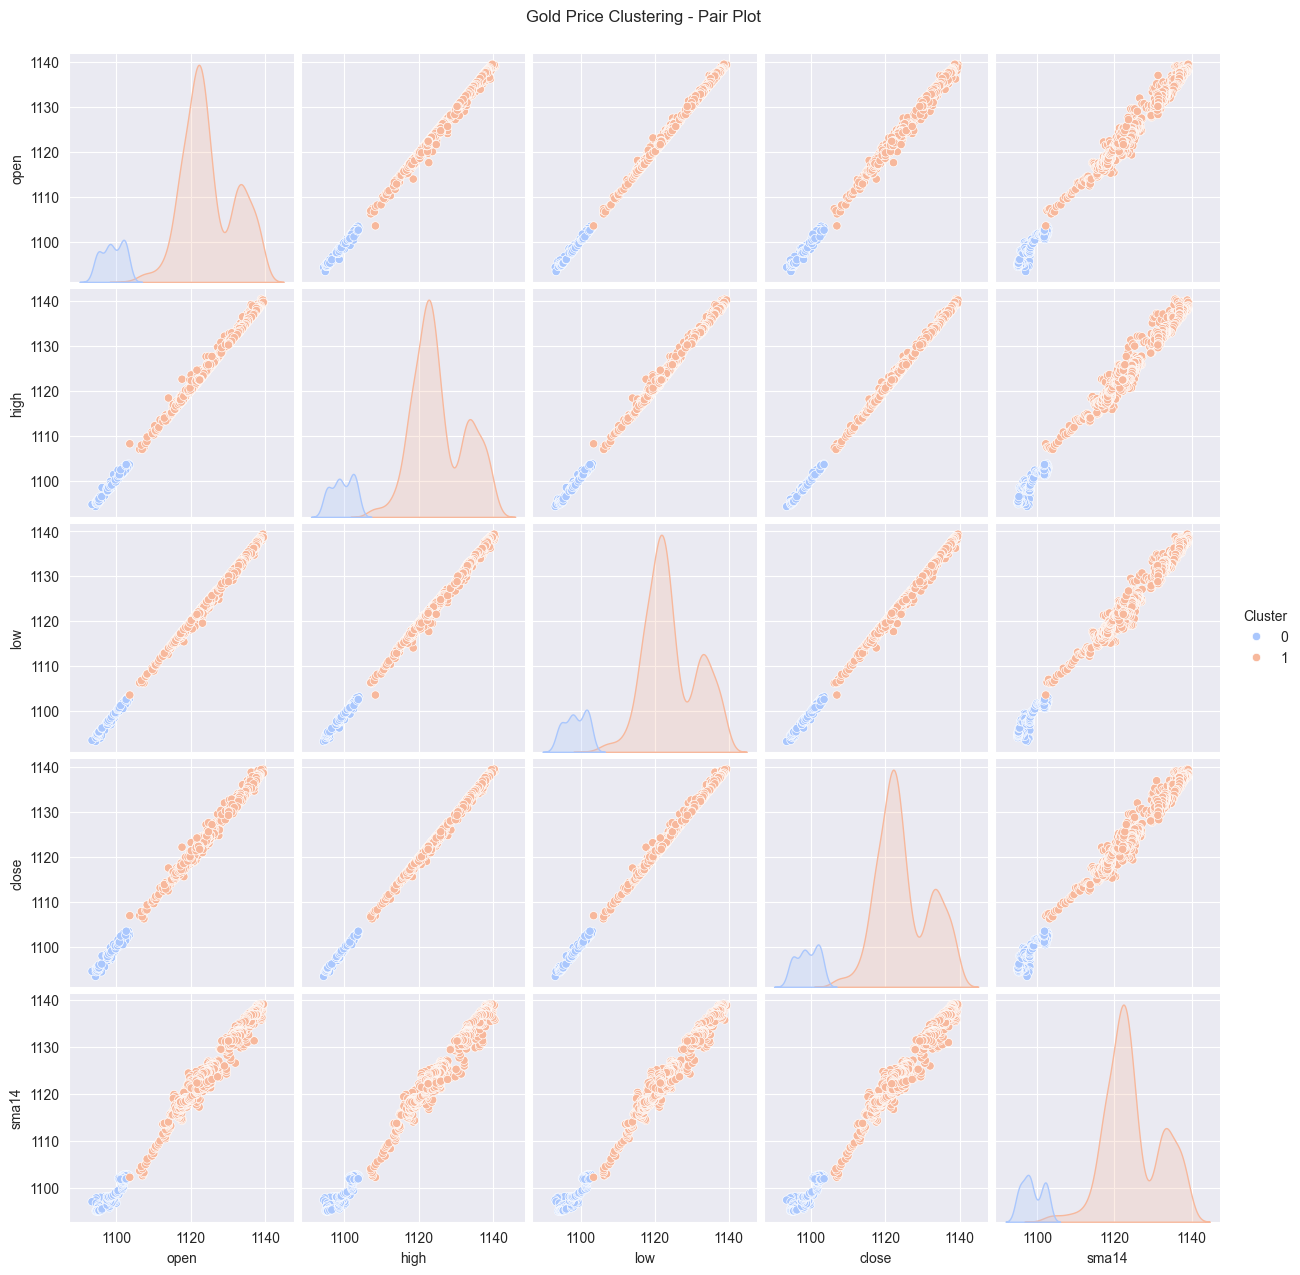

In [6]:

# Pair Plot
plt.figure(figsize=(15, 10))
sns.pairplot(
    df,
    vars=features,
    hue='Cluster',
    palette='coolwarm'
)
plt.suptitle('Gold Price Clustering - Pair Plot', y=1.02)
plt.show()

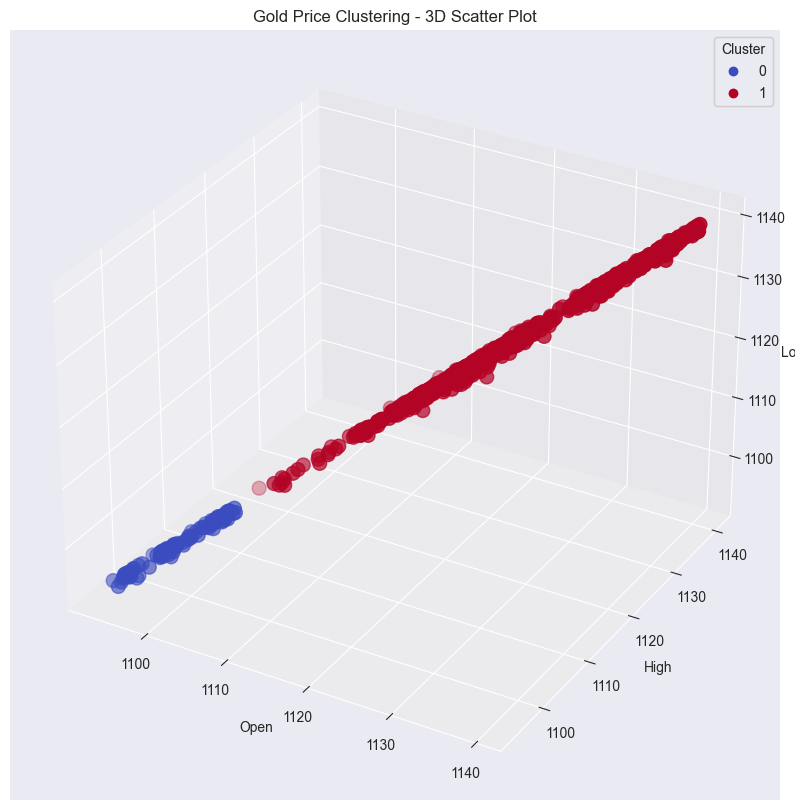

In [7]:

# 3D Scatter Plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['open'],
    df['high'],
    df['low'],
    c=df['Cluster'],
    cmap='coolwarm',
    s=100)
ax.set_title('Gold Price Clustering - 3D Scatter Plot')
ax.set_xlabel('Open')
ax.set_ylabel('High')
ax.set_zlabel('Low')
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)
plt.show()

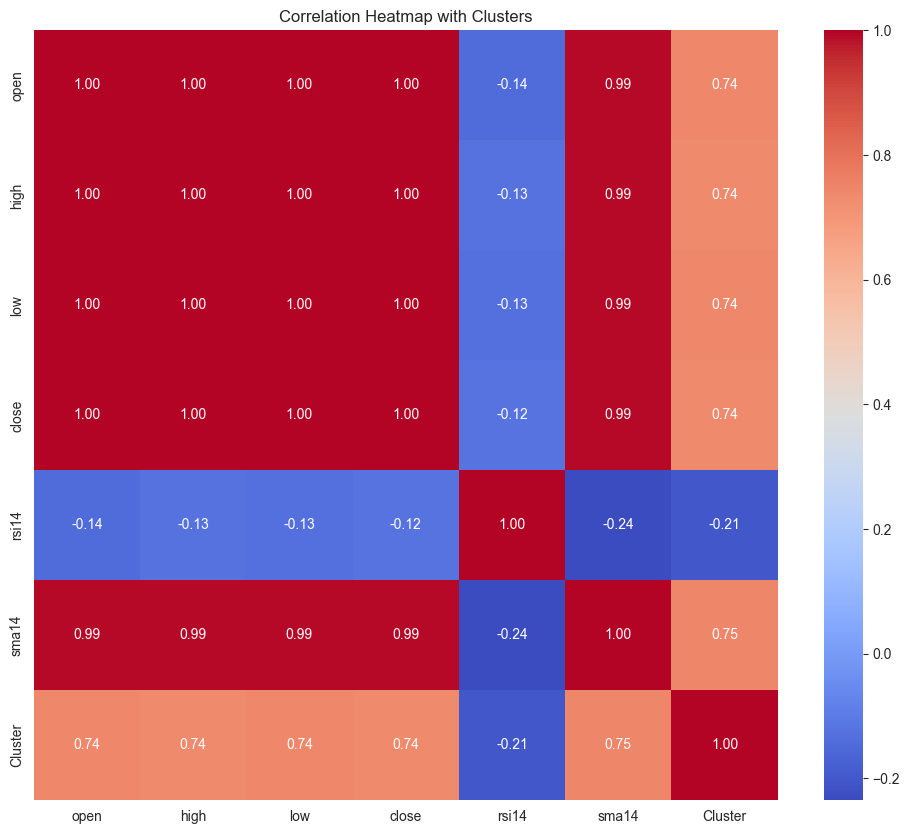

In [7]:

# Heatmap
plt.figure(figsize=(12, 10))
corr = df[features + ['Cluster']].corr()
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f')
plt.title('Correlation Heatmap with Clusters')
plt.show()

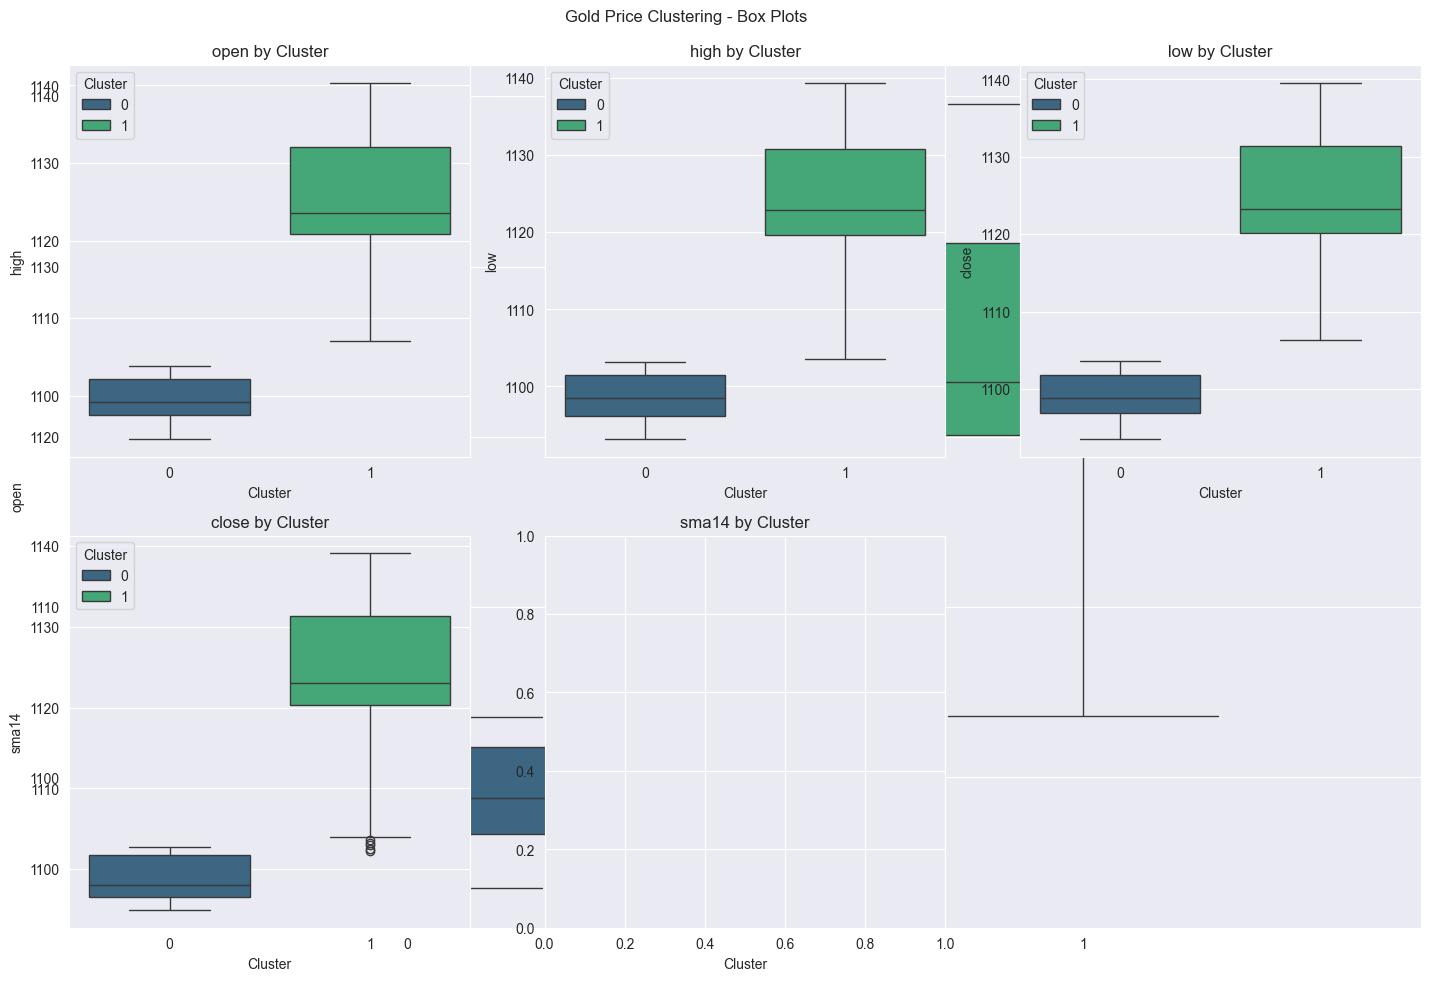

In [16]:

# Box Plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    sns.boxplot(
        data=df,
        x='Cluster',
        y=feature,
        palette='viridis',
        # x='time',
        # y='close',
        hue='Cluster',

    )
    plt.subplot(2, 3, i + 1)
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.suptitle('Gold Price Clustering - Box Plots', y=1.02)
plt.show()


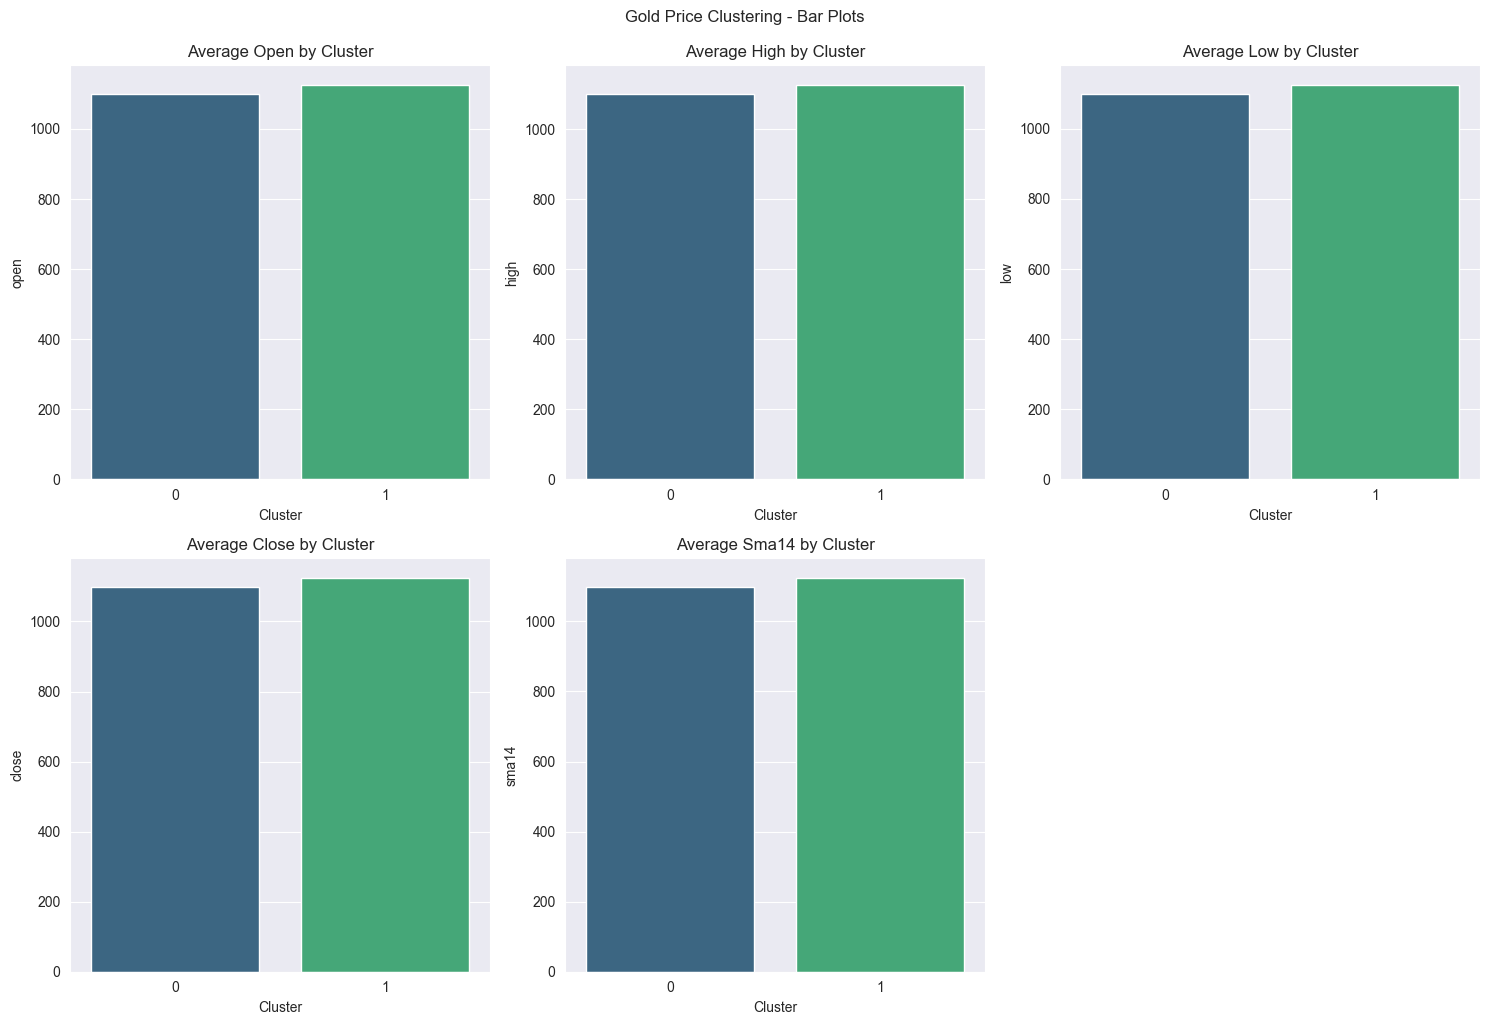

In [17]:
# Create bar plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.barplot(
        data=df,
        x='Cluster',
        y=feature,
        palette='viridis',
        hue='Cluster',
        legend=False
    )
    plt.title(f'Average {feature.capitalize()} by Cluster')
plt.tight_layout()
plt.suptitle('Gold Price Clustering - Bar Plots', y=1.02)
plt.show()